In [2]:
import numpy as np

actions = [ '좋다', '날씨', 'ㄱ']

data = np.concatenate([
    np.load('C:/Users/iytse/OneDrive/바탕 화면/kt/dataset/seq_좋다_1660867317.npy'),
    np.load('C:/Users/iytse/OneDrive/바탕 화면/kt/dataset/seq_날씨_1660867317.npy'),
    np.load('C:/Users/iytse/OneDrive/바탕 화면/kt/dataset/seq_ㄱ_1660867317.npy')
])

data.shape

(2154, 30, 100)

In [3]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(2154, 30, 99)
(2154,)


In [4]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(2154, 3)

In [5]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(1938, 30, 99) (1938, 3)
(216, 30, 99) (216, 3)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]), # node 개수 64개
    Dense(32, activation='relu'), # node 개수 32개
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc']) # loss='categorical_crossentropy -> 3개의 action 중 어떤 건지 모델에게 추론하게 함
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                41984     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 44,163
Trainable params: 44,163
Non-trainable params: 0
_________________________________________________________________


In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/save_model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)


Epoch 1/200
57/61 [===========================>..] - ETA: 0s - loss: 76.0330 - acc: 0.4989
Epoch 1: val_acc improved from -inf to 0.58333, saving model to models\save_model.h5
61/61 [==============================] - 3s 17ms/step - loss: 74.2782 - acc: 0.4995 - val_loss: 37.5263 - val_acc: 0.5833 - lr: 0.0010
Epoch 2/200
57/61 [===========================>..] - ETA: 0s - loss: 14.3737 - acc: 0.7999
Epoch 2: val_acc improved from 0.58333 to 0.87037, saving model to models\save_model.h5
61/61 [==============================] - 1s 13ms/step - loss: 13.7049 - acc: 0.8050 - val_loss: 6.6301 - val_acc: 0.8704 - lr: 0.0010
Epoch 3/200
60/61 [============================>.] - ETA: 0s - loss: 23.9284 - acc: 0.7536
Epoch 3: val_acc did not improve from 0.87037
61/61 [==============================] - 1s 12ms/step - loss: 24.0319 - acc: 0.7513 - val_loss: 25.0125 - val_acc: 0.6389 - lr: 0.0010
Epoch 4/200
56/61 [==========================>...] - ETA: 0s - loss: 58.4798 - acc: 0.5977
Epoch 4: val_

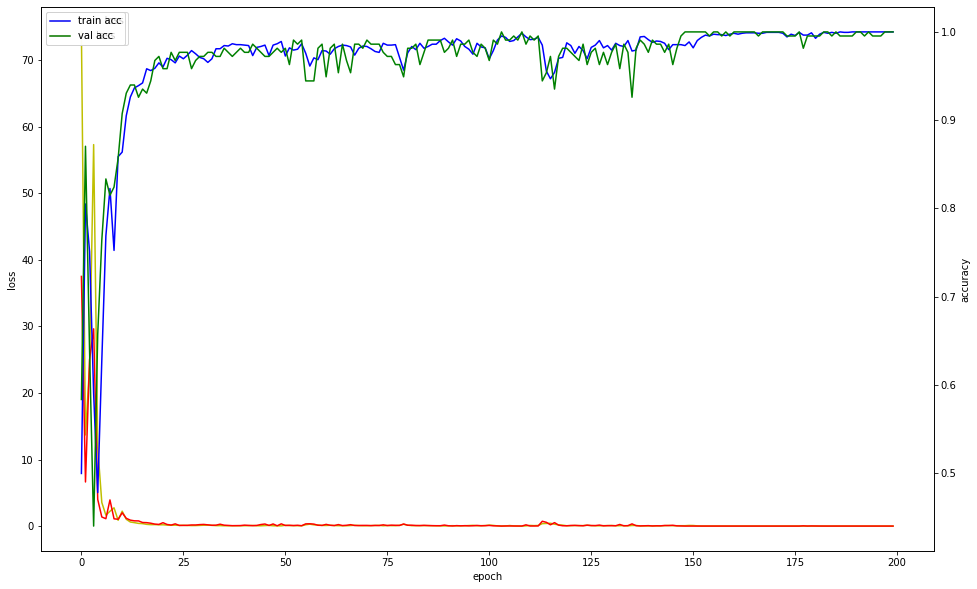

In [8]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()